# Merge SparseNets

In [34]:
import networkx as nx
import itertools
import random as R
import matplotlib.pyplot as plt
from graph.sparsenet import sparsenet

Let's see if the distribution of lengths of the paths are the same if two graphs are isometric.

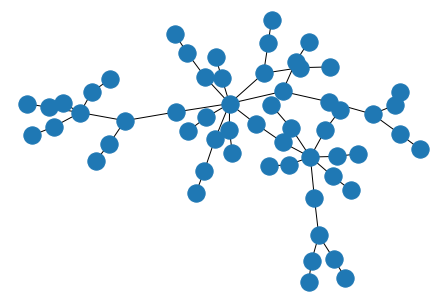

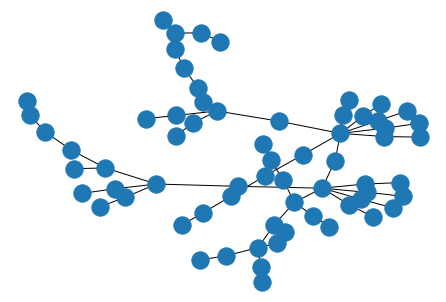

In [113]:
G = nx.gnm_random_graph(200, 1000)
cipher = { a:b for a, b in zip(G.nodes(), R.sample(G.nodes(), len(G.nodes()))) }
H = nx.Graph()
for src, destinations in G.adjacency():
    for dest in destinations:
        H.add_edge(cipher[src], cipher[dest])

distance_matrix = nx.floyd_warshall_numpy(G)
vertex_to_index = { node:i for i, node in enumerate(G.nodes) }
edges = sum(([(src, dest) for src, dest in zip(path, path[1:])] for path in sparsenet(G, distance_matrix, vertex_to_index)), [])
G_sp = nx.edge_subgraph(G, edges)

distance_matrix = nx.floyd_warshall_numpy(H)
vertex_to_index = { node:i for i, node in enumerate(H.nodes) }
edges = sum(([(src, dest) for src, dest in zip(path, path[1:])] for path in sparsenet(H, distance_matrix, vertex_to_index)), [])
H_sp = nx.edge_subgraph(H, edges)

nx.draw(G_sp)
plt.show()
nx.draw(H_sp)

In [114]:
nx.is_isomorphic(G_sp, H_sp)

False